In [1]:
# Import our dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
#Determine the number of unique values in each column
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [3]:
# Drop the non-beneficial ID columns
application_df = application_df.drop(['STATUS'], axis = 1)

In [4]:
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,0,N,5000,1


In [5]:
#Determine the number of unique values in each column
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [6]:
# Drop the non-beneficial columns
application_df = application_df.drop(['EIN', 'SPECIAL_CONSIDERATIONS', 'NAME', 'CLASSIFICATION'], axis = 1)

In [7]:
application_df

,APPLICATION_TYPE,AFFILIATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,ProductDev,Association,0,5000,1
1,T3,Independent,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,Heathcare,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...
34294,T4,Independent,ProductDev,Association,0,5000,0
34295,T4,CompanySponsored,ProductDev,Association,0,5000,0
34296,T3,CompanySponsored,Preservation,Association,0,5000,0
34297,T5,Independent,ProductDev,Association,0,5000,1


In [8]:
#Look at application type value counts for binning

In [9]:
application_type = application_df.APPLICATION_TYPE.value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

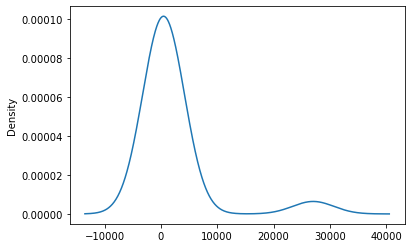

In [10]:
application_type.plot.density()

In [11]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type[application_type < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [12]:
application_df = application_df.dropna()
application_df

,APPLICATION_TYPE,AFFILIATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,ProductDev,Association,0,5000,1
1,T3,Independent,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,Heathcare,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...
34294,T4,Independent,ProductDev,Association,0,5000,0
34295,T4,CompanySponsored,ProductDev,Association,0,5000,0
34296,T3,CompanySponsored,Preservation,Association,0,5000,0
34297,T5,Independent,ProductDev,Association,0,5000,1


In [13]:
#Look at ASK_AMT value counts for binning
amt_type = application_df.ASK_AMT.value_counts()
amt_type

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [14]:
type(amt_type)

pandas.core.series.Series

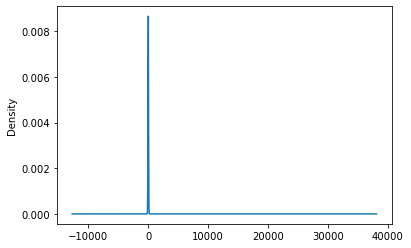

In [15]:
amt_type.plot.density()

In [16]:
#Look at INCOME_AMT value counts for binning
income_type = application_df.INCOME_AMT.value_counts()
income_type

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [17]:
type(income_type)

pandas.core.series.Series

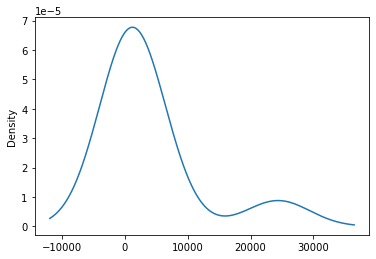

In [18]:
income_type.plot.density()

In [19]:
# Determine which values to replace if counts are less than ..?
replace_class = list(income_type[income_type < 10000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0        24388
Other     9911
Name: INCOME_AMT, dtype: int64

In [20]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE', 'AFFILIATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT']

In [21]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_Other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [22]:
application_cat

['APPLICATION_TYPE', 'AFFILIATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT']

In [23]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True)
application_df = application_df.drop(application_cat,1)
application_df

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_Other
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
34295,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
34296,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34297,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [24]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
x = application_df.drop(["IS_SUCCESSFUL"], 1).values

# Split the preprocessed data into a training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=120)

In [25]:
x_train

array([[9.93707e+05, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.29449e+05, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [5.00000e+03, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [5.00000e+03, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       [5.00000e+03, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       [5.00000e+03, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [26]:
x_test

array([[1.85709e+05, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [5.00000e+03, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       [7.28540e+04, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [5.00000e+03, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       [5.00000e+03, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       [5.00000e+03, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00]])

In [27]:
y_train

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [28]:
y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [29]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(x_train[0]) 
hidden_nodes_layer1 = 90
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 70
hidden_nodes_layer4 = 60

model = tf.keras.models.Sequential()

# First hidden layer
model.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

#Fourth Hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                2250      
_________________________________________________________________
dense_1 (Dense)              (None, 80)                7280      
_________________________________________________________________
dense_2 (Dense)              (None, 70)                5670      
_________________________________________________________________
dense_3 (Dense)              (None, 60)                4260      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 61        
Total params: 19,521
Trainable params: 19,521
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
# Train the model
fit_model = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 917us/step - loss: 0.6948 - accuracy: 0.5147
Epoch 2/200
804/804 [==============================] - 1s 934us/step - loss: 0.6912 - accuracy: 0.5380
Epoch 3/200
804/804 [==============================] - 1s 906us/step - loss: 0.6912 - accuracy: 0.5357
Epoch 4/200
804/804 [==============================] - 1s 918us/step - loss: 0.6924 - accuracy: 0.5257
Epoch 5/200
804/804 [==============================] - 1s 930us/step - loss: 0.6919 - accuracy: 0.5294
Epoch 6/200
804/804 [==============================] - 1s 912us/step - loss: 0.6911 - accuracy: 0.5280
Epoch 7/200
804/804 [==============================] - 1s 912us/step - loss: 0.6916 - accuracy: 0.5265
Epoch 8/200
804/804 [==============================] - 1s 933us/step - loss: 0.6915 - accuracy: 0.5349
Epoch 9/200
804/804 [==============================] - 1s 975us/step - loss: 0.6913 - accuracy: 0.5329
Epoch 10/200
804/804 [==============================] - 1s 919us/step - l

804/804 [==============================] - 1s 871us/step - loss: 0.6915 - accuracy: 0.5324
Epoch 80/200
804/804 [==============================] - 1s 869us/step - loss: 0.6908 - accuracy: 0.5365
Epoch 81/200
804/804 [==============================] - 1s 861us/step - loss: 0.6920 - accuracy: 0.5243
Epoch 82/200
804/804 [==============================] - 1s 877us/step - loss: 0.6904 - accuracy: 0.5397
Epoch 83/200
804/804 [==============================] - 1s 873us/step - loss: 0.6911 - accuracy: 0.5354
Epoch 84/200
804/804 [==============================] - 1s 877us/step - loss: 0.6916 - accuracy: 0.5323
Epoch 85/200
804/804 [==============================] - 1s 879us/step - loss: 0.6907 - accuracy: 0.5375
Epoch 86/200
804/804 [==============================] - 1s 877us/step - loss: 0.6912 - accuracy: 0.5350
Epoch 87/200
804/804 [==============================] - 1s 874us/step - loss: 0.6914 - accuracy: 0.5322
Epoch 88/200
804/804 [==============================] - 1s 878us/step - loss:

804/804 [==============================] - 1s 881us/step - loss: 0.6911 - accuracy: 0.5323
Epoch 158/200
804/804 [==============================] - 1s 879us/step - loss: 0.6907 - accuracy: 0.5354
Epoch 159/200
804/804 [==============================] - 1s 881us/step - loss: 0.6901 - accuracy: 0.5395
Epoch 160/200
804/804 [==============================] - 1s 927us/step - loss: 0.6912 - accuracy: 0.5310
Epoch 161/200
804/804 [==============================] - 1s 879us/step - loss: 0.6903 - accuracy: 0.5376
Epoch 162/200
804/804 [==============================] - 1s 866us/step - loss: 0.6913 - accuracy: 0.5306
Epoch 163/200
804/804 [==============================] - 1s 873us/step - loss: 0.6908 - accuracy: 0.5346
Epoch 164/200
804/804 [==============================] - 1s 869us/step - loss: 0.6903 - accuracy: 0.5382
Epoch 165/200
804/804 [==============================] - 1s 864us/step - loss: 0.6908 - accuracy: 0.5347
Epoch 166/200
804/804 [==============================] - 1s 873us/ste

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(x_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6918 - accuracy: 0.5268
Loss: 0.6918409466743469, Accuracy: 0.5267638564109802


In [34]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [35]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cb_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=3,
    save_weights_only=True,
    save_freq=3050)

# Train the model
fit_model = model.fit(x_train_scaled,y_train,epochs=100,callbacks=[cb_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(x_test_scaled,y_test,verbose=3)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 1s 916us/step - loss: 0.6906 - accuracy: 0.5357
Epoch 2/100
804/804 [==============================] - 1s 897us/step - loss: 0.6907 - accuracy: 0.5349
Epoch 3/100
804/804 [==============================] - 1s 919us/step - loss: 0.6903 - accuracy: 0.5380
Epoch 4/100
600/804 [=====================>........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 945us/step - loss: 0.6907 - accuracy: 0.5350
Epoch 5/100
804/804 [==============================] - 1s 888us/step - loss: 0.6901 - accuracy: 0.5393
Epoch 6/100
804/804 [==============================] - 1s 887us/step - loss: 0.6905 - accuracy: 0.5366
Epoch 7/100
804/804 [==============================] - 1s 894us/step - loss: 0.6909 - accuracy: 0.5336
Epoch 8/100
450/804 [===============>..............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 00008: saving model to checkpoints

804/804 [==============================] - 1s 923us/step - loss: 0.6906 - accuracy: 0.5358
Epoch 60/100
804/804 [==============================] - 1s 917us/step - loss: 0.6901 - accuracy: 0.5394
Epoch 61/100
546/804 [===================>..........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5359
Epoch 00061: saving model to checkpoints\weights.61.hdf5
804/804 [==============================] - 1s 948us/step - loss: 0.6907 - accuracy: 0.5353
Epoch 62/100
804/804 [==============================] - 1s 919us/step - loss: 0.6908 - accuracy: 0.5344
Epoch 63/100
804/804 [==============================] - 1s 911us/step - loss: 0.6908 - accuracy: 0.5341
Epoch 64/100
804/804 [==============================] - 1s 924us/step - loss: 0.6912 - accuracy: 0.5313
Epoch 65/100
384/804 [=============>................] - ETA: 0s - loss: 0.6900 - accuracy: 0.5401
Epoch 00065: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 942us/step - loss: 0.6904 - accuracy: 0.5375
E